# Testing Transport and EOS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate

from constants import *
from physics import JT_GMS, SMT

from pandas import read_csv
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# CHECK out SMT for λ_dB

# Transport Coefficients

## Electron Thermal Conductivity (Double Check!!!)

#### Carbon from TCCW
We first test our conductivity via comparison with results from TCCW
### "Review of the first charged-particle transport coefficient comparison workshop"
Grabowski et al.


#### The following plot is for $\rho=1$ g/cc

In [2]:
Te = np.geomspace(1e-2,2e3)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12

m_i = m_p*A

rho = 10*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

ke_tccw_rho1_data = read_csv("data/tccw-1/ke_rho_1e0-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [2.96831121 2.96831927 2.9683295  2.96834247 2.96835893 2.96837981
 2.9684063  2.96843992 2.96848256 2.96853666 2.9686053  2.96869237
 2.96880283 2.96894294 2.96912068 2.96934612 2.96963205 2.96999467
 2.97045451 2.97103761 2.97177693 2.97271436 2.97390308 2.97541099
 2.97732524 2.97975903 2.9828622  2.98683904 2.99198038 2.99872424
 3.00777403 3.0203313  3.03854733 3.06635829 3.1108605  3.18398974
 3.30280653 3.48434506 3.73297343 4.03042245 4.34312413 4.64006983
 4.90294027 5.1253626  5.30826991 5.45597009 5.57382459 5.66710615
 5.74052141 5.79806682]


Below we see agreement between SMT and JT_GMS models at very high T, well above the region TCCW probed. The behaviour difference is essentially due to the extremely small $\rm{ln}\Lambda$ parameter, which at the far left of this graph is $\sim 10^{-3}$, representing such strong screening that the idea of a Debye screening length must be completely broken. Most of the graph is extremely sensitive to exactly what is put in the lnΛ. 

In [3]:
SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)

array([8.96966223e+00, 1.08338833e+01, 1.31120882e+01, 1.59035397e+01,
       1.93334588e+01, 2.35604924e+01, 2.87865587e+01, 3.52699084e+01,
       4.33425723e+01, 5.34338319e+01, 6.61020312e+01, 8.20780371e+01,
       1.02325106e+02, 1.28122070e+02, 1.61179970e+02, 2.03807118e+02,
       2.59144924e+02, 3.31508077e+02, 4.26879934e+02, 5.53640472e+02,
       7.23644730e+02, 9.53830854e+02, 1.26862655e+03, 1.70354692e+03,
       2.31052979e+03, 3.16569980e+03, 4.38029592e+03, 6.11531449e+03,
       8.60011680e+03, 1.21559167e+04, 1.72296337e+04, 2.44555602e+04,
       3.47801872e+04, 4.97003348e+04, 7.16210763e+04, 1.06402845e+05,
       1.61905917e+05, 2.51419239e+05, 3.98272534e+05, 6.42195140e+05,
       1.05088331e+06, 1.74086564e+06, 2.91424414e+06, 4.92305188e+06,
       8.38232699e+06, 1.43693219e+07, 2.47751057e+07, 4.29261600e+07,
       7.46851843e+07, 1.30404080e+08])

In [4]:
SMT.gij_plasma_parameter(n_e, Te, n_i, Ti, m_i, Zstar, Te, 1 )

array([4.57239253e+03, 3.56417628e+03, 2.77827241e+03, 2.16566089e+03,
       1.68813062e+03, 1.31589607e+03, 1.02573947e+03, 7.99562541e+02,
       6.23257717e+02, 4.85828144e+02, 3.78701778e+02, 2.95196712e+02,
       2.30104396e+02, 1.79364759e+02, 1.39812966e+02, 1.08982013e+02,
       8.49488499e+01, 6.62144348e+01, 5.16102295e+01, 4.02253151e+01,
       3.13495746e+01, 2.44294015e+01, 1.90331727e+01, 1.48243326e+01,
       1.15404147e+01, 8.97669727e+00, 6.97348713e+00, 5.40625854e+00,
       4.17806136e+00, 3.21374706e+00, 2.45561912e+00, 1.86005878e+00,
       1.39455722e+00, 1.03467182e+00, 7.60992342e-01, 5.56836821e-01,
       4.07213076e-01, 2.98780982e-01, 2.20255636e-01, 1.62880484e-01,
       1.20507692e-01, 8.90403946e-02, 6.56697594e-02, 4.83515822e-02,
       3.55463047e-02, 2.60897103e-02, 1.91094401e-02, 1.39585576e-02,
       1.01604491e-02, 7.36456359e-03])

In [5]:
SMT.ion_Debye_length(n_i, Ti, Zstar)

array([3.54691736e-13, 4.01737187e-13, 4.55022299e-13, 5.15374499e-13,
       5.83730869e-13, 6.61152657e-13, 7.48841689e-13, 8.48158931e-13,
       9.60645479e-13, 1.08804629e-12, 1.23233696e-12, 1.39575399e-12,
       1.58082888e-12, 1.79042654e-12, 2.02778848e-12, 2.29658128e-12,
       2.60095086e-12, 2.94558297e-12, 3.33577053e-12, 3.77748777e-12,
       4.27747176e-12, 4.84331060e-12, 5.48353770e-12, 6.20773007e-12,
       7.02660679e-12, 7.95212006e-12, 8.99752425e-12, 1.01773929e-11,
       1.15075206e-11, 1.30045735e-11, 1.46851904e-11, 1.65638904e-11,
       1.86484640e-11, 2.09304380e-11, 2.33675307e-11, 2.58591259e-11,
       2.82354367e-11, 3.03143757e-11, 3.20484501e-11, 3.36204485e-11,
       3.53381633e-11, 3.74639739e-11, 4.01581686e-11, 4.35108981e-11,
       4.75840923e-11, 5.24366512e-11, 5.81360840e-11, 6.47634338e-11,
       7.24155806e-11, 8.12067788e-11])

In [6]:
SMT.effective_screening_length(n_e, Te, n_i, Ti, Zstar)

array([3.14646816e-11, 3.14646849e-11, 3.14646895e-11, 3.14646958e-11,
       3.14647046e-11, 3.14647169e-11, 3.14647343e-11, 3.14647589e-11,
       3.14647944e-11, 3.14648458e-11, 3.14649212e-11, 3.14650329e-11,
       3.14652006e-11, 3.14654550e-11, 3.14658451e-11, 3.14664493e-11,
       3.14673938e-11, 3.14688822e-11, 3.14712444e-11, 3.14750165e-11,
       3.14810699e-11, 3.14908238e-11, 3.15065882e-11, 3.15321170e-11,
       3.15734892e-11, 3.16404847e-11, 3.17486613e-11, 3.19223111e-11,
       3.21982328e-11, 3.26295341e-11, 3.32872006e-11, 3.42552644e-11,
       3.56150344e-11, 3.74181923e-11, 3.96570907e-11, 4.22463220e-11,
       4.50309232e-11, 4.78404580e-11, 5.05867717e-11, 5.33225189e-11,
       5.61798604e-11, 5.92685171e-11, 6.26413958e-11, 6.63180696e-11,
       7.03175647e-11, 7.46800738e-11, 7.94770515e-11, 8.48134794e-11,
       9.08255908e-11, 9.76764429e-11])

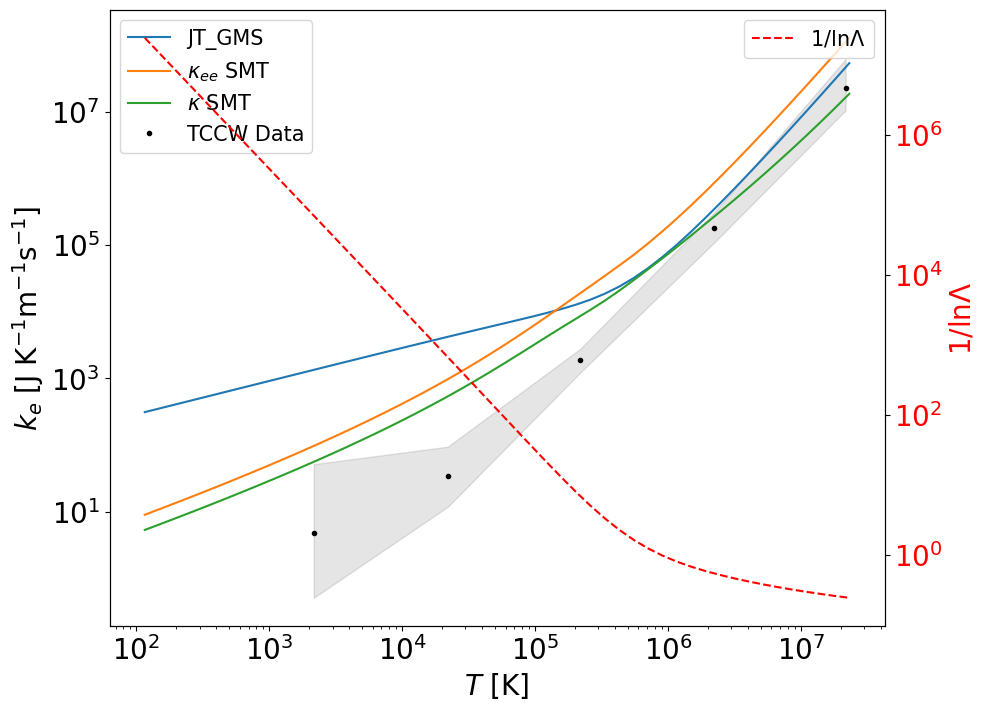

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa_{ee}$ SMT')
ax.plot(Te, SMT.total_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa$ SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.tick_params(labelsize=20)

ax.legend(fontsize=15)

# ax.grid()